In [1]:
#@markdown Install `mplhep`
%%capture
!pip install mplhep

In [1]:
#@markdown #USCMS Diveristy Data: Gender distribution in CMS leadership
#@markdown Count gender distribution in leadership roles for various years

#@markdown ### Import `python` libraries

import os, json
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib import rc
import ipywidgets as widgets
import mplhep as hep

from google.colab import drive
drive.mount( '/content/drive' )

%cd /content/drive/My Drive/Physics Research/CMS/Analysis/USCMS-diversity-analysis-main/

Mounted at /content/drive
/content/drive/My Drive/Physics Research/CMS/Analysis/USCMS-diversity-analysis-main


In [2]:
#@markdown Method for `plot_cms( count, params, key, save )`
def plot_cms( count, params, key, save = False ):
  plt.style.use( hep.style.CMS )

  width = 0.8 
  x = np.arange( len( count[ key ][ "Y" ] ) )

  if len(x) < 10:
    plt.figure( figsize = ( 10, 10 ) )
  else:
    plt.figure( figsize = ( len( x ), 10 ) )

  plt.bar( 
      x, count[ key ][ "F" ], width,
      color = "lightgreen", edgecolor = "black", lw = 2, zorder = 3,
      label = r"$\bf{Women}$"
    )
  plt.bar(
      x, count[ key ][ "M" ], width, bottom = count[ key ][ "F" ],
      color = "dodgerblue", edgecolor = "black", lw = 2, zorder = 3,
      label = "Men"
  )

  count_total = np.array( count[ key ][ "F" ] ) + np.array( count[ key ][ "M" ] )

  for xi in x:
    plt.text(
        xi, count[ key ][ "F" ][xi] + max( count_total ) / 40, 
        "{:.0f}%".format( 100 * count[ key ]["F"][xi] / count_total[xi] ),
        fontsize = params[ key ][ "BAR" ], weight = "bold", ha = "center"
    )

  hep.cms.text( key, fontsize = params[ key ][ "CMS" ] )
  hep.cms.lumitext( "All CMS", fontsize = params[ key ][ "CMS" ] )
  plt.xticks( x, labels = count[ key ][ "Y" ], fontsize = params[ key ][ "TICKS" ] )
  plt.yticks( fontsize = params[ key ][ "TICKS" ] )
  plt.ylabel( "Count", y = 1.0, ha = "right", fontsize = params[ key ][ "YLABEL" ] )
  plt.ylim( 0, max( count_total ) * 1.2 )
  plt.legend( loc = 2, fontsize = params[ key ][ "LEGEND"] )
  if save == True:
    if not os.path.exists( os.getcwd() + "/Plots/ ") != True: os.makedirs( os.getcwd() + "/Plots/" )
    plt.savefig( "./Plots/CMS {} by Gender.png".format( key ), transparent = True )
  plt.show()
  plt.close()


In [3]:
#@markdown Method for `plot_uscms( count, params, key, save )`

def plot_uscms( count, params, key = "L1 DSP", save = False ):
  plt.style.use( hep.style.CMS )

  width = 0.8 
  x = np.arange( len( count[ key ][ "Y" ] ) )

  if len(x) < 10:
    plt.figure( figsize = ( 10, 10 ) )
  else:
    plt.figure( figsize = ( len( x ), 10 ) )

  plt.bar( 
      x, count[ key ][ "F" ], width,
      color = "lightgreen", edgecolor = "black", lw = 2, zorder = 3,
      label = r"$\bf{Women}$"
    )
  plt.bar(
      x, count[ key ][ "M" ], width, bottom = count[ key ][ "F" ],
      color = "dodgerblue", edgecolor = "black", lw = 2, zorder = 3,
      label = "Men"
  )

  count_total = np.array( count[ key ][ "F" ] ) + np.array( count[ key ][ "M" ] )

  for xi in x:
    plt.text(
        xi, count[ key ][ "F" ][xi] + max( count_total ) / 40, 
        "{:.0f}%".format( 100 * count[ key ]["F"][xi] / count_total[xi] ),
        fontsize = params[ key ][ "BAR" ], weight = "bold", ha = "center"
    )

  hep.cms.text( key, fontsize = params[ key ][ "CMS" ] )
  hep.cms.lumitext( "USCMS", fontsize = params[ key ][ "CMS" ] )
  plt.xticks( x, labels = count[ key ][ "Y" ], fontsize = params[ key ][ "TICKS" ] )
  plt.yticks( fontsize = params[ key ][ "TICKS" ] )
  plt.ylabel( "Count", y = 1.0, ha = "right", fontsize = params[ key ][ "YLABEL" ] )
  plt.ylim( 0, max( count_total ) * 1.2 )
  plt.legend( loc = 2, fontsize = params[ key ][ "LEGEND"] )
  if save == True:
    if not os.path.exists( os.getcwd() + "/Plots/ ") != True: os.makedirs( os.getcwd() + "/Plots/" )
    plt.savefig( "./Plots/USCMS {} by Gender.png".format( key ), transparent = True )
  plt.show()
  plt.close()

In [4]:
#@markdown Method for `plot_comparison_v1( count, params, key, save )`

def plot_comparison_v1( count, params, key = "L1 DSP", save = False ):
  plt.style.use( hep.style.CMS )

  width = 0.8 
  x = np.arange( len( count[ "CMS" ][ key ][ "Y" ] ) )

  if len(x) < 10:
    plt.figure( figsize = ( 10,10 ) )
  else:
    plt.figure( figsize = ( len(x), 10 ) )

  plt.bar( 
      x, count[ "CMS" ][ key ][ "F" ], width,
      color = "lightgreen", edgecolor = "black", lw = 2, zorder = 3,
      label = r"$\bf{Women}$"   
    )
  plt.bar(
      x, count[ "CMS" ][ key ][ "M" ], width, bottom = count[ "CMS" ][ key ][ "F" ],
      color = "dodgerblue", edgecolor = "black", lw = 2, zorder = 3,
      label = "Men"
  )
  plt.bar( 
      x, count[ "USCMS" ][ key ][ "F" ], width,
      facecolor = "None", hatch = "\\" , edgecolor = "black", lw = 2, zorder = 3,
      label = r"$\it{USCMS}$"
    )
  plt.bar(
      x, count[ "USCMS" ][ key ][ "M" ], width, bottom = count[ "CMS" ][ key ][ "F" ],
      facecolor = "None", hatch = "\\", edgecolor = "black", lw = 2, zorder = 3
  )

  count_total_1 = np.array( count[ "CMS" ][ key ][ "F" ] ) + np.array( count[ "CMS" ][ key ][ "M" ] )
  count_total_2 = np.array( count[ "USCMS" ][ key ][ "F" ] ) + np.array( count[ "USCMS" ][ key ][ "M" ] )

  for xi in x:
    plt.text(
        xi, count_total_1[xi] + max( count_total_1 ) / 15.0, 
        "{:.0f}%".format( 100. * ( count[ "CMS" ][ key ][ "F" ][xi] ) / ( count_total_1[xi] ) ),
        fontsize = params[ key ][ "BAR" ], weight = "bold", ha = "center"
    )
    plt.text(
        xi, count_total_1[xi] + max( count_total_1 ) / 50.0, 
        "{:.0f}%".format( 100. * ( count_total_2[xi] ) / ( count_total_1[xi] ) ),
        fontsize = params[ key ][ "BAR" ], style = "italic", ha = "center"
    )

  hep.cms.text( key, fontsize = params[ key ][ "CMS" ] )
  hep.cms.lumitext( "USCMS vs CMS", fontsize = params[ key ][ "CMS" ] )
  plt.xticks( x, labels = count[ "CMS" ][ key ][ "Y" ], fontsize = params[ key ][ "TICKS" ] )
  plt.yticks( fontsize =  params[ key ][ "TICKS" ] )
  plt.ylabel( "Count", y = 1.0, ha = "right", fontsize =  params[ key ][ "YLABEL" ] )
  plt.ylim( 0, max( count_total_1 ) * 1.2 )
  plt.legend( loc = 2, fontsize =  params[ key ][ "LEGEND" ] )
  if save == True:
    if not os.path.exists( os.getcwd() + "/Plots/ ") != True: os.makedirs( os.getcwd() + "/Plots/" )
    plt.savefig( "./Plots/USCMS vs CMS {} by Gender.png".format( key ), transparent = True )
  plt.show()
  plt.close()

In [5]:
#@markdown Method for `plot_comparison_v2( count, params, key, save )`

def plot_comparison_v2( count, params, key = "L1 DSP", save = False ):
  plt.style.use( hep.style.CMS )

  width = 0.4
  x1 = np.array( [ num + 0.05 for num in np.arange( len( count[ "CMS" ][ key ][ "Y" ] ) ) ] )
  x2 = np.array( [ num + 0.45 for num in np.arange( len( count[ "USCMS" ][ key ][ "Y" ] ) ) ] )

  scale = len( x1 ) if len( x1 ) > 9 else 10

  plt.figure( figsize = ( scale, 10 ) )

  plt.bar( 
      x1, count[ "CMS" ][ key ][ "F" ], width,
      color = "lightgreen", edgecolor = "black", lw = 2, zorder = 3,
      label = "Women"  
    )
  plt.bar(
      x1, count[ "CMS" ][ key ][ "M" ], width, bottom = count[ "CMS" ][ key ][ "F" ],
      color = "dodgerblue", edgecolor = "black", lw = 2, zorder = 3,
      label = "Men"
  )
  plt.bar( 
      x2, count[ "USCMS" ][ key ][ "F" ], width,
      facecolor = "khaki", edgecolor = "black", lw = 2, zorder = 3,
      label = "USCMS Women"  
    )
  plt.bar(
      x2, count[ "USCMS" ][ key ][ "M" ], width, bottom = count[ "USCMS" ][ key ][ "F" ],
      facecolor = "pink", edgecolor = "black", lw = 2, zorder = 3,
      label = "USCMS Men"
  )

  count_total_1 = np.array( count[ "CMS" ][ key ][ "F" ] ) + np.array( count[ "CMS" ][ key ][ "M" ] )
  count_total_2 = np.array( count[ "USCMS" ][ key ][ "F" ] ) + np.array( count[ "USCMS" ][ key ][ "M" ] )

  for xi, x in enumerate( x1 ):
    plt.text(
        x, count[ "CMS" ][ key ][ "F" ][ xi ] + max( count_total_1 ) / 50.0, 
        "{:.0f}%".format( 100. * ( count[ "CMS" ][ key ][ "F" ][xi] ) / count_total_1[xi] ),
        fontsize = params[ key ][ "BAR" ]*0.5, ha = "center"
    )
  for xi, x in enumerate( x2 ):
    if count_total_2[xi] < 1: continue
    if count_total_2[xi] == count[ "USCMS" ][ key ][ "F" ][ xi ]:
      plt.text(
          x, count_total_2[xi] + max( count_total_1 ) / 20.0, 
          "{:.0f}%".format( 100. * ( count_total_2[xi] / count_total_1[xi] ) ),
          fontsize = params[ key ][ "BAR" ]*0.5, ha = "center", weight = "bold"
      )
    else:
      plt.text(
          x, count_total_2[xi] + max( count_total_1 ) / 50.0, 
          "{:.0f}%".format( 100. * ( count_total_2[xi] / count_total_1[xi] ) ),
          fontsize = params[ key ][ "BAR" ]*0.5, ha = "center", weight = "bold"
      )
    plt.text(
        x, count[ "USCMS" ][ key ][ "F" ][xi] + max( count_total_1 ) / 50.0,
        "{:.0f}%".format( 100. * ( count[ "USCMS" ][ key ][ "F" ][xi] / count_total_2[xi] ) ),
        fontsize = params[ key ][ "BAR" ]*0.5, ha = "center"
    )

  plt.text( max(x1) - 5 , max( count_total_1 )*1.05, r"$\bf{USCMS\ to\ CMS\ Ratio\ on\ Total\ Bar}$" + "\nGender Ratio on Women Bar", fontsize = params[ key ][ "TICKS" ] )
  hep.cms.text( key, fontsize = params[ key ][ "CMS" ] )
  hep.cms.lumitext( "USCMS vs CMS", fontsize = params[ key ][ "CMS" ] )
  plt.xticks( x1 + 0.25, labels = count[ "CMS" ][ key ][ "Y" ], fontsize = params[ key ][ "TICKS" ] )
  plt.yticks( fontsize = params[ key ][ "TICKS" ] )
  plt.ylabel( "Count", y = 1.0, ha = "right", fontsize = params[ key ][ "YLABEL" ] )
  plt.ylim( 0, max( count_total_1 ) * 1.2 )
  plt.legend( loc = 2, fontsize = params[ key ][ "LEGEND" ]  )
  if save == True:
    if not os.path.exists( os.getcwd() + "/Plots/ ") != True: os.makedirs( os.getcwd() + "/Plots/" )
    plt.savefig( "./Plots/USCMS vs CMS {} by Gender.png".format( key ), transparent = True )
  plt.show()
  plt.close()

In [6]:
#@markdown Load in leadership data
file_names = [ option for option in os.listdir( "./Data/" ) if "cms_leadership" in option and ".csv" in option ]
files = {
    file_name: open( "./Data/{}".format(file_name) ).readlines() for file_name in file_names
}

In [7]:
#@markdown Format the Physics Office data
PO_file = [ file_name for file_name in file_names if "PO_" in file_name ][0]

PO_data = {}
PO_keys = {}

this_year = ""
for line in files[PO_file]:
  if "FRA" in line:
    for i, header in enumerate( line.split(",") ):
      if header != "": PO_keys[ i ] = header 
  if "Office" in line:
    entries = line.split(",")
    if "20" in line: 
      this_year = entries[0]
      PO_data[this_year] = {}
    PO_data[this_year][entries[2]] = {}
    for i, entry in enumerate( entries[:-2] ):
      if entry == "1": PO_data[ this_year ][ entries[2] ][ "REGION" ] = PO_keys[i]
    if entries[-2] == "1":
      PO_data[ this_year ][ entries[2] ][ "GENDER" ] = "F"
    else:
      PO_data[ this_year ][ entries[2] ][ "GENDER" ] = "M"


In [8]:
#@markdown Format the L1 DSP data
L1DSP_file = [ file_name for file_name in file_names if "L1DSP" in file_name ][0]

L1DSP_data = {}
L1DSP_keys = {}

this_year = ""
for line in files[L1DSP_file]:
  if "role" in line:
    for i, header in enumerate( line.split(",") ):
      if header != "" and header != "role": L1DSP_keys[ i ] = header 
  if "Office" in line:
    entries = line.split(",")
    if "20" in line: 
      this_year = entries[0]
      L1DSP_data[this_year] = {}
    L1DSP_data[this_year][entries[2]] = {}
    for i, entry in enumerate( entries[:-2] ):
      if entry == "1": L1DSP_data[ this_year ][ entries[2] ][ "REGION" ] = L1DSP_keys[i]
    if entries[-1].strip() == "1":
      L1DSP_data[ this_year ][ entries[2] ][ "GENDER" ] = "F"
    else:
      L1DSP_data[ this_year ][ entries[2] ][ "GENDER" ] = "M"

In [9]:
#@markdown Format the L2 PAG data
L2PAG_file = [ file_name for file_name in file_names if "L2PAG" in file_name ][0]

PAG_GROUPS = set( [ line.split(",")[1] for line in files[ L2PAG_file ] if line.split(",")[1] != "" ] )

L2PAG_data = {}
L2PAG_keys = {}

this_year = ""
for line in files[L2PAG_file]:
  if "FRA" in line:
    for i, header in enumerate( line.split(",") ):
      if header != "": L2PAG_keys[ i ] = header 
  if line.split(",")[1] in PAG_GROUPS:
    entries = line.split(",")
    if "20" in line: 
      this_year = entries[0]
      L2PAG_data[ this_year ] = {}
    L2PAG_data[ this_year ][ entries[2] ] = {}
    L2PAG_data[ this_year ][ entries[2] ][ "GROUP" ] = entries[1].strip()
    for i, entry in enumerate( entries[:-2] ):
      if entry == "1": L2PAG_data[ this_year ][ entries[2] ][ "REGION" ] = L2PAG_keys[i]
    if entries[-2].strip() == "1":
      L2PAG_data[ this_year ][ entries[2] ][ "GENDER" ] = "F"
    else:
      L2PAG_data[ this_year ][ entries[2] ][ "GENDER" ] = "M"

In [10]:
#@markdown Format the L2 POG data
L2POG_file = [ file_name for file_name in file_names if "L2POG" in file_name ][0]

POG_GROUPS = set( [ line.split(",")[1] for line in files[ L2POG_file ] if line.split(",")[1] != "" ] )

L2POG_data = {}
L2POG_keys = {}

this_year = ""
for line in files[L2POG_file]:
  if "FRA" in line:
    for i, header in enumerate( line.split(",") ):
      if header != "": L2POG_keys[ i ] = header 
  if line.split(",")[1] in POG_GROUPS:
    entries = line.split(",")
    if "20" in line: 
      this_year = entries[0]
      L2POG_data[this_year] = {}
    L2POG_data[this_year][entries[2]] = {}
    L2POG_data[this_year][entries[2]][ "GROUP" ] = entries[1].strip()
    for i, entry in enumerate( entries[:-2] ):
      if entry.strip() == "1": L2POG_data[ this_year ][ entries[2] ][ "REGION" ] = L2POG_keys[i]
    if entries[-2] == "1":
      L2POG_data[ this_year ][ entries[2] ][ "GENDER" ] = "F"
    else:
      L2POG_data[ this_year ][ entries[2] ][ "GENDER" ] = "M"

## Count the Gender Distributions

In [32]:
#@markdown Instantiate counting containers
count = {
    category: {
        sub_category: {
            "Y": [], "M": [], "F": []
        } for sub_category in [ "L1 & SP team", "L2 POG", "L2 PAG", "L2 POG, L2 PAG", "L1 DSP, L2 POG, L2 PAG" ]
    } for category in [ "CMS", "USCMS" ]
}

In [33]:
#@markdown Count L2 POG roles by gender and year

minYear = min( [ int(year) for year in list( PO_data.keys() ) + list( L2POG_data.keys() ) ] )
maxYear = max( [ int(year) for year in list( PO_data.keys() ) + list( L2POG_data.keys() ) ] )

for year in np.linspace( minYear, maxYear, maxYear - minYear + 1 ):
  year = str(int(year))
  this_count = { "M": 0, "F": 0 }
  this_count_us = { "M": 0, "F": 0 }
  if year in PO_data.keys():
    for name in PO_data[ year ]:
      this_count[ PO_data[ year ][ name ][ "GENDER" ] ] += 1
      if PO_data[ year ][ name ][ "REGION" ] == "USA": this_count_us[ PO_data[ year ][ name ][ "GENDER" ] ] += 1
  if year in L2POG_data.keys():
    for name in L2POG_data[ year ]:
      this_count[ L2POG_data[ year ][ name ][ "GENDER" ] ] += 1
      if "REGION" in L2POG_data[ year ][ name ].keys():
        if L2POG_data[ year ][ name ][ "REGION" ] == "USA": this_count_us[ L2POG_data[ year ][ name ][ "GENDER" ] ] += 1
  if year in list( PO_data.keys() ) + list( L2POG_data.keys() ):
    count[ "CMS" ][ "L2 POG" ][ "Y" ].append( year )
    count[ "USCMS" ][ "L2 POG" ][ "Y" ].append( year )
    count[ "CMS" ][ "L2 POG" ][ "M" ].append( this_count[ "M" ] )
    count[ "CMS" ][ "L2 POG" ][ "F" ].append( this_count[ "F" ] )
    count[ "USCMS" ][ "L2 POG" ][ "M" ].append( this_count_us[ "M" ] )
    count[ "USCMS" ][ "L2 POG" ][ "F" ].append( this_count_us[ "F" ] )

In [34]:
#@markdown Count L2 PAG roles by gender and year

for year in L2PAG_data:
  this_count = { "M": 0, "F": 0 }
  this_count_us = { "M": 0, "F": 0 }
  if year in L2PAG_data.keys():
    for name in L2PAG_data[ year ]:
      this_count[ L2PAG_data[ year ][ name ][ "GENDER" ] ] += 1
      if "REGION" in L2PAG_data[ year ][ name ].keys():
        if L2PAG_data[ year ][ name ][ "REGION" ] == "USA": this_count_us[ L2PAG_data[ year ][ name ][ "GENDER" ] ] += 1
  count[ "CMS" ][ "L2 PAG" ][ "Y" ].append( year )
  count[ "USCMS" ][ "L2 PAG" ][ "Y" ].append( year )
  count[ "CMS" ][ "L2 PAG" ][ "M" ].append( this_count[ "M" ] )
  count[ "CMS" ][ "L2 PAG" ][ "F" ].append( this_count[ "F" ] )
  count[ "USCMS" ][ "L2 PAG" ][ "M" ].append( this_count_us[ "M" ] )
  count[ "USCMS" ][ "L2 PAG" ][ "F" ].append( this_count_us[ "F" ] )

In [35]:
#@markdown Count L1 DSP roles by gender and year

for year in L1DSP_data:
  this_count = { "M": 0, "F": 0 }
  this_count_us = { "M": 0, "F": 0 }
  if year in L1DSP_data.keys():
    for name in L1DSP_data[ year ]:
      this_count[ L1DSP_data[ year ][ name ][ "GENDER" ] ] += 1
      if "REGION" in L1DSP_data[ year ][ name ].keys():
        if L1DSP_data[ year ][ name ][ "REGION" ] == "USA": this_count_us[ L1DSP_data[ year ][ name ][ "GENDER" ] ] += 1
  count[ "CMS" ][ "L1 & SP team" ][ "Y" ].append( year )
  count[ "USCMS" ][ "L1 & SP team" ][ "Y" ].append( year )
  count[ "CMS" ][ "L1 & SP team" ][ "M" ].append( this_count[ "M" ] )
  count[ "CMS" ][ "L1 & SP team" ][ "F" ].append( this_count[ "F" ] )
  count[ "USCMS" ][ "L1 & SP team" ][ "M" ].append( this_count_us[ "M" ] )
  count[ "USCMS" ][ "L1 & SP team" ][ "F" ].append( this_count_us[ "F" ] )

In [36]:
#@markdown Count L2 POG + L2 PAG roles by gender and year

minYear = min( [ int(year) for year in list( PO_data.keys() ) + list( L2POG_data.keys() ) + list( L2PAG_data.keys() ) ] )
maxYear = max( [ int(year) for year in list( PO_data.keys() ) + list( L2POG_data.keys() ) + list( L2PAG_data.keys() ) ] )

for year in np.linspace( minYear, maxYear, maxYear - minYear + 1 ):
  year = str(int(year))
  this_count = { "M": 0, "F": 0 }
  this_count_us = { "M": 0, "F": 0 }
  if year in PO_data.keys():
    for name in PO_data[ year ]:
      this_count[ PO_data[ year ][ name ][ "GENDER" ] ] += 1
      if PO_data[ year ][ name ][ "REGION" ] == "USA": this_count_us[ PO_data[ year ][ name ][ "GENDER" ] ] += 1
  if year in L2POG_data.keys():
    for name in L2POG_data[ year ]:
      this_count[ L2POG_data[ year ][ name ][ "GENDER" ] ] += 1
      if "REGION" in L2POG_data[ year ][ name ].keys():
        if L2POG_data[ year ][ name ][ "REGION" ] == "USA": this_count_us[ L2POG_data[ year ][ name ][ "GENDER" ] ] += 1
  if year in L2PAG_data.keys():
    for name in L2PAG_data[ year ]:
      this_count[ L2PAG_data[ year ][ name ][ "GENDER" ] ] += 1
      if "REGION" in L2PAG_data[ year ][ name ].keys():
        if L2PAG_data[ year ][ name ][ "REGION" ] == "USA": this_count_us[ L2PAG_data[ year ][ name ][ "GENDER" ] ] += 1
  if year in list( PO_data.keys() ) + list( L2POG_data.keys() ):
    count[ "CMS" ][ "L2 POG, L2 PAG" ][ "Y" ].append( year )
    count[ "USCMS" ][ "L2 POG, L2 PAG" ][ "Y" ].append( year )
    count[ "CMS" ][ "L2 POG, L2 PAG" ][ "M" ].append( this_count[ "M" ] )
    count[ "CMS" ][ "L2 POG, L2 PAG" ][ "F" ].append( this_count[ "F" ] )
    count[ "USCMS" ][ "L2 POG, L2 PAG" ][ "M" ].append( this_count_us[ "M" ] )
    count[ "USCMS" ][ "L2 POG, L2 PAG" ][ "F" ].append( this_count_us[ "F" ] )

In [37]:
#@markdown Count L2 POG + L2 PAG + L1 DSP roles by gender and year

minYear = min( [ int(year) for year in list( PO_data.keys() ) + list( L2POG_data.keys() ) + list( L2PAG_data.keys() ) + list( L1DSP_data.keys() ) ] )
maxYear = max( [ int(year) for year in list( PO_data.keys() ) + list( L2POG_data.keys() ) + list( L2PAG_data.keys() ) + list( L1DSP_data.keys() ) ] )

for year in np.linspace( minYear, maxYear, maxYear - minYear + 1 ):
  year = str(int(year))
  this_count = { "M": 0, "F": 0 }
  this_count_us = { "M": 0, "F": 0 }
  if year in PO_data.keys():
    for name in PO_data[ year ]:
      this_count[ PO_data[ year ][ name ][ "GENDER" ] ] += 1
      if PO_data[ year ][ name ][ "REGION" ] == "USA": this_count_us[ PO_data[ year ][ name ][ "GENDER" ] ] += 1
  if year in L2POG_data.keys():
    for name in L2POG_data[ year ]:
      this_count[ L2POG_data[ year ][ name ][ "GENDER" ] ] += 1
      if "REGION" in L2POG_data[ year ][ name ].keys():
        if L2POG_data[ year ][ name ][ "REGION" ] == "USA": this_count_us[ L2POG_data[ year ][ name ][ "GENDER" ] ] += 1
  if year in L2PAG_data.keys():
    for name in L2PAG_data[ year ]:
      this_count[ L2PAG_data[ year ][ name ][ "GENDER" ] ] += 1
      if "REGION" in L2PAG_data[ year ][ name ].keys():
        if L2PAG_data[ year ][ name ][ "REGION" ] == "USA": this_count_us[ L2PAG_data[ year ][ name ][ "GENDER" ] ] += 1
  if year in L1DSP_data.keys():
    for name in L1DSP_data[ year ]:
      this_count[ L1DSP_data[ year ][ name ][ "GENDER" ] ] += 1
      if "REGION" in L1DSP_data[ year ][ name ].keys():
        if L1DSP_data[ year ][ name ][ "REGION" ] == "USA": this_count_us[ L1DSP_data[ year ][ name ][ "GENDER" ] ] += 1
  if year in list( PO_data.keys() ) + list( L2POG_data.keys() ) + list( L2PAG_data.keys() ) + list( L1DSP_data.keys() ):
    count[ "CMS" ][ "L1 DSP, L2 POG, L2 PAG" ][ "Y" ].append( year )
    count[ "USCMS" ][ "L1 DSP, L2 POG, L2 PAG" ][ "Y" ].append( year )
    count[ "CMS" ][ "L1 DSP, L2 POG, L2 PAG" ][ "M" ].append( this_count[ "M" ] )
    count[ "CMS" ][ "L1 DSP, L2 POG, L2 PAG" ][ "F" ].append( this_count[ "F" ] )
    count[ "USCMS" ][ "L1 DSP, L2 POG, L2 PAG" ][ "M" ].append( this_count_us[ "M" ] )
    count[ "USCMS" ][ "L1 DSP, L2 POG, L2 PAG" ][ "F" ].append( this_count_us[ "F" ] )

## Perform Plotting

In [38]:
#@markdown Define some plotting parameters

params = {
    "L1 & SP team": {
        "TICKS": 18,
        "LEGEND": 26,
        "CMS": 34,
        "BAR": 18,
        "YLABEL": 26
    },
    "L2 PAG": {
        "TICKS": 18,
        "LEGEND": 20,
        "CMS": 34,
        "BAR": 18,
        "YLABEL": 26
    },
    "L2 POG": {
        "TICKS": 18,
        "LEGEND": 30,
        "CMS": 38,
        "BAR": 18,
        "YLABEL": 26
    },
    "L2 POG, L2 PAG": {
        "TICKS": 18,
        "LEGEND": 26,
        "CMS": 34,
        "BAR": 18,
        "YLABEL": 26
    },
    "L1 DSP, L2 POG, L2 PAG":{
        "TICKS": 18,
        "LEGEND": 26,
        "CMS": 34,
        "BAR": 18,
        "YLABEL": 26    
    }
}

In [39]:
#@markdown Choose a group to plot
plot_key = widgets.Select( options = params.keys() )
plot_key

Select(options=('L1 & SP team', 'L2 PAG', 'L2 POG', 'L2 POG, L2 PAG', 'L1 DSP, L2 POG, L2 PAG'), value='L1 & S…

In [27]:
#@markdown Save plots?
save_key = widgets.Select( options = [ True, False ], value = False )
save_key

Select(index=1, options=(True, False), value=False)

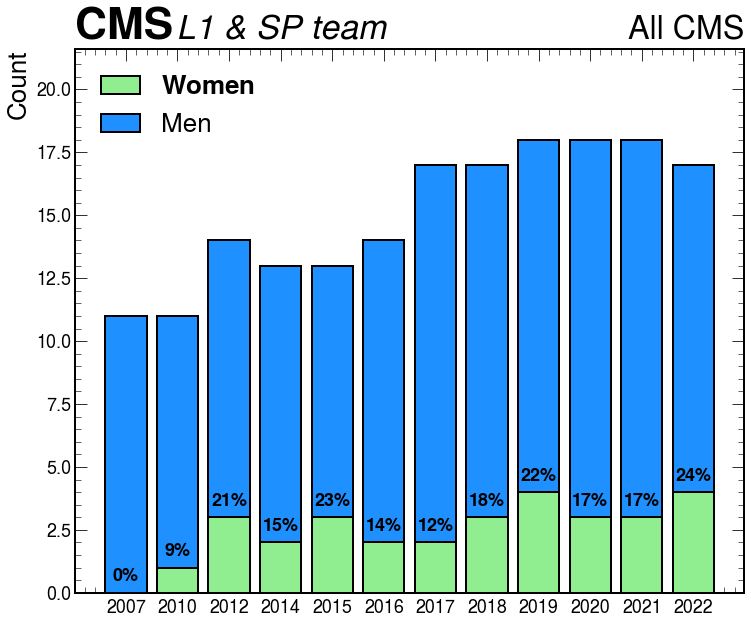

In [40]:
#@markdown Run `plot_cms()`
plot_cms( count[ "CMS" ], params, plot_key.value, save_key.value )

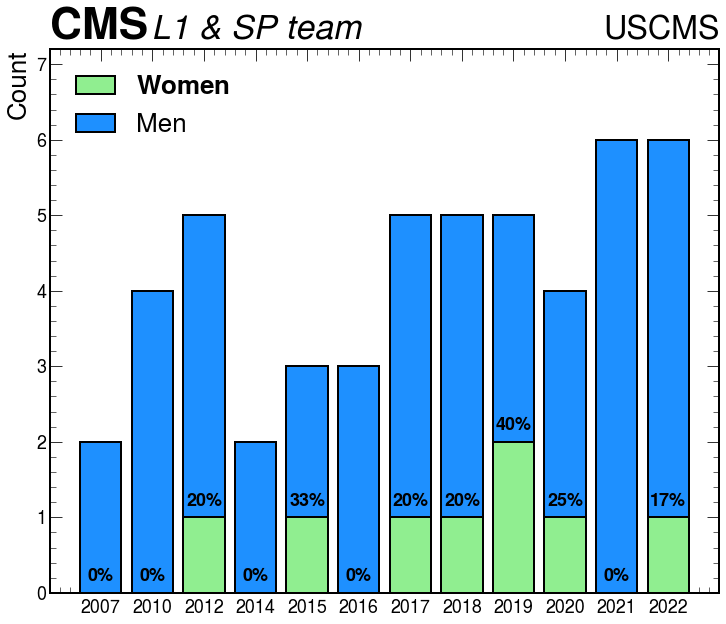

In [41]:
#@markdown Run `plot_uscms()`
plot_uscms( count[ "USCMS"], params, plot_key.value, save_key.value )

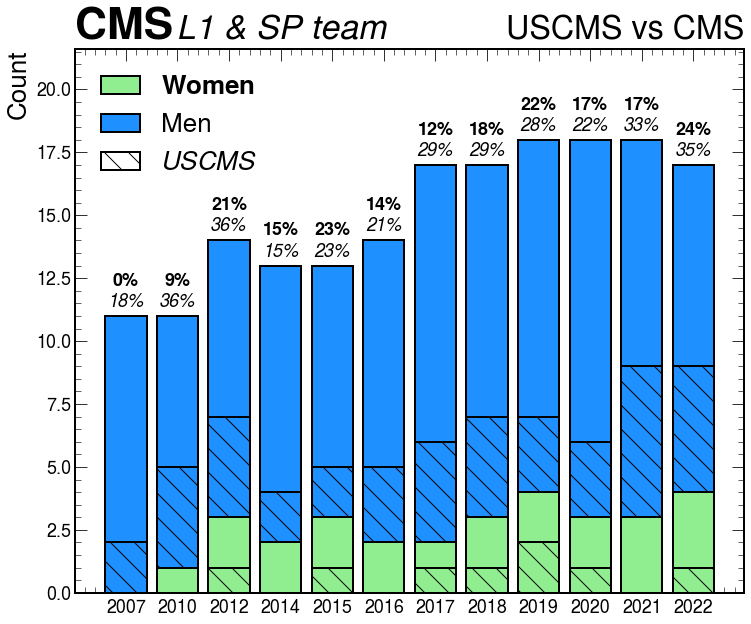

In [42]:
#@markdown Run `plot_comparison_v1()`
plot_comparison_v1( count, params, plot_key.value, save_key.value )

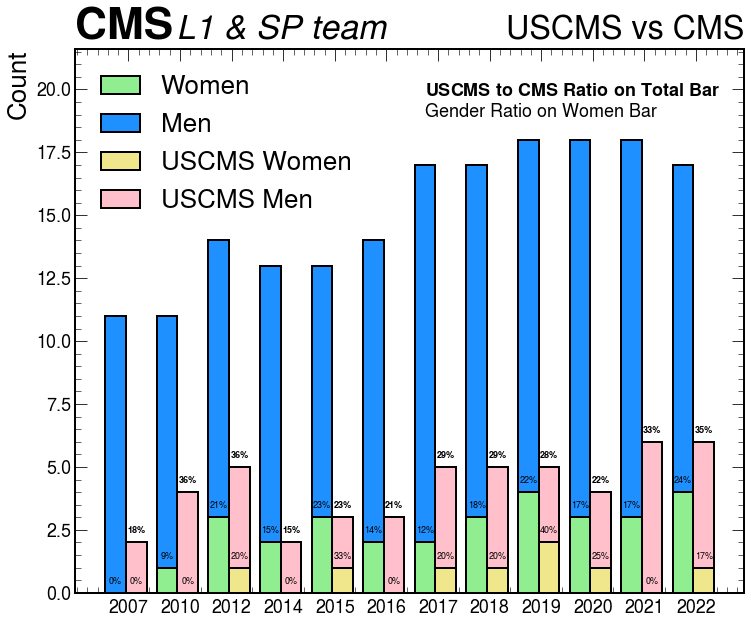

In [43]:
#@markdown Run `plot_comparison_v2()`
plot_comparison_v2( count, params, plot_key.value, save_key.value )

## Visualize funding per year

In [44]:
#@markdown ### Select and Load in the Relevant `json` Files
#@markdown Choose the years to consolidate
people_stats = [ option for option in os.listdir( "./Data/" ) if "people_stats" in option ]
people_stats_years = [ name.split(".")[0].split("_")[2][:4] for name in people_stats ]
yearlist = widgets.SelectMultiple( options = sorted(people_stats_years) )
yearlist

SelectMultiple(options=('2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'…

In [45]:
#@markdown Load-in the `people_stats*.json` files and the CMS ID keys 
funding = {
    "DOE": [],
    "NSF": [],
    "NSF MREFC": [],
    "NSF CA": []
}
for line in open("./Data/uscms_funding_2021.csv").readlines():  
  if "California," in line: line = line.replace( "California,","California")
  contents = line.split(",")
  name = contents[1].strip().strip("\"").upper()
  if name == "": continue
  if contents[2].strip() == "DOE": funding[ "DOE" ].append( name )
  if contents[2].strip() == "NSF": funding[ "NSF" ].append( name )
  if contents[3].strip() == "YES": funding[ "NSF MREFC" ].append( name )
  if contents[4].strip() == "YES": funding[ "NSF CA" ].append( name )

leaders = {}

for line in open( "./Data/uscms_leadership_institutes2021.csv" ).readlines():
  contents = line.split(",")
  if "Last" in line: continue
  years = [ year.strip("\n") for year in contents[-1].split(".") ]
  leaders[ contents[2] ] = years

json_files = {
    "people_new": json.load( open( "Data/people_new.json" ) ),
    "institutes_new": json.load( open( "Data/institutes_new.json" ) ),
    "people_stats": { year: json.load( open( "Data/people_stats_{}1231.json".format( year ) ) ) for year in yearlist.value }
}

institute_list = np.array( [ list( institute.values() ) for institute in json_files[ "institutes_new" ] ] )

id_info = {}
for person in json_files[ "people_new" ]:
  id_info[ str( person[ "cmsId" ] ) ] = { 
    "BIRTHYEAR": person[ "birthYear" ],
    "GENDER": person[ "gender" ]   
  }

data = {
    year: {} for year in yearlist.value
}

for year in yearlist.value:
  for person in json_files[ "people_stats" ][ year ]:
    data[ year ][ str( person[ "cms_id" ] ) ] = {
        "ACTIVITY": person[ "activity_cms" ],
        "INSTITUTE": person[ "inst_code" ],
        "AUTHOR": person[ "is_author" ],
        "STATUS": person[ "status_cms" ],
        "GENDER": id_info[ str( person[ "cms_id" ] ) ][ "GENDER" ],
        "BIRTHYEAR": id_info[ str( person[ "cms_id" ] ) ][ "BIRTHYEAR" ]
    }

In [46]:
#@markdown Obtain the gender count for NSF CA funding by US institute for the past $N$ years

institutes = {
    institute: {
        year: {
            "M": 0, "F": 0, "T": 0
        } for year in yearlist.value
    } for institute in funding[ "NSF CA" ]
}

for leader in leaders:
  for year in leaders[ leader ]:
    if year not in yearlist.value: continue
    gender = data[ year ][ leader ][ "GENDER" ]
    institute = data[ year ][ leader ][ "INSTITUTE" ]
    if institute in funding[ "NSF CA" ]:
      institutes[ institute ][ year ][ gender ] += 1
      institutes[ institute ][ year ][ "T" ] += 1

for institute in institutes:
  institutes[ institute ][ "TOTAL" ] = {
      "M": 0, "F": 0, "T": 0
  }
  for year in institutes[ institute ]:
    if year != "TOTAL":
      for category in [ "M", "F", "T" ]:
        institutes[ institute ][ "TOTAL" ][ category ] += institutes[ institute ][ year ][ category ]

In [49]:
#@markdown Print a table of the NSF CA Institutes and their Gender Distribution

entries_df = []
for institute in institutes:
  entries = institutes[ institute ][ "TOTAL" ]
  entries_df.append(
      (
        institute, 
        entries[ "M" ],
        entries[ "F" ], 
        entries[ "T" ]
      )
  )

total_count = {
    "M": 0, "F": 0, "T": 0
}
for entry in entries_df:
  total_count[ "M" ] += entry[ 1 ]
  total_count[ "F" ] += entry[ 2 ]
  total_count[ "T" ] += entry[ 3 ] 

entries_df.append(
    (
      "Total",
      total_count[ "M" ],
      total_count[ "F" ],
      total_count[ "T" ]
    )
)

print( "L1 & SP Team, L2 POG, L2 PAG from {} to {}".format( yearlist.value[0], yearlist.value[-1] ) )
institutes_df = pd.DataFrame( np.array( entries_df ), columns = [ "NSF CA Institute", "Male", "Female", "Total" ] )
#institutes_df.style.set_caption("NSF CA Funding by USCMS Institutes for L1, L1 DSP, L2 PAG and L2 POG from {} to {}".format( yearlist.value[0], yearlist.value[-1] ) )
institutes_df



L1 & SP Team, L2 POG, L2 PAG from 2017 to 2021


,NSF CA Institute,Male,Female,Total
0,UCLA,1,0,1
1,UCSD,5,0,5
2,CALTECH,1,0,1
3,CORNELL,0,0,0
4,FLORIDA-UNIV,1,0,1
5,CHICAGO,0,0,0
6,JOHNS-HOPKINS,2,0,2
7,KANSAS-UNIV,2,0,2
8,MIT,7,1,8
9,NEBRASKA,2,3,5


In [16]:
#@markdown Print out the US members in L1, L1 DSP, L2 POG, and L2 PAG positions and years served

leaders_US = {}

for data in [ PO_data, L1DSP_data ]:
  for year in data:
    for member in data[ year ]:
      if "REGION" not in data[ year ][ member ].keys(): continue
      if data[ year ][ member ][ "REGION" ] == "USA":
        if member not in leaders_US.keys():
          leaders_US[ member ] = []
        leaders_US[ member ].append( year )

for data in [ L2POG_data, L2PAG_data ]:
  for year in data:
    for member in data[ year ]:
      if "REGION" not in data[ year ][ member ].keys(): continue
      if data[ year ][ member ][ "GROUP" ] == "HIN": continue
      if data[ year ][ member ][ "REGION" ] == "USA":
        if member not in leaders_US.keys():
          leaders_US[ member ] = []
        leaders_US[ member ].append( year )

In [17]:
#@markdown Print out the USCMS members and years served in leadership position
for leader in sorted( leaders_US.keys() ):
  print( "{}: {}".format( leader, sorted( leaders_US[ leader ] ) ) )

Acosta: ['2021', '2022']
Alison: ['2022']
Barberis: ['2019', '2020']
Benedetti: ['2013', '2014']
Beryhill: ['2012', '2013']
Bhattacharya: ['2022']
Bose: ['2015', '2017', '2018', '2019']
Burkett: ['2009', '2010']
Butler: ['2017', '2018']
Campagnari: ['2008', '2009', '2016', '2017']
Cavanaugh: ['2007', '2008']
Cerati: ['2013', '2014']
Chou: ['2013', '2014']
Coubez: ['2020', '2021']
Covarelli: ['2015', '2016']
Dasu: ['2008', '2009']
Demiragli: ['2018', '2019', '2022']
Dutta: ['2022']
Elvira: ['2008', '2009']
Eno: ['2007', '2008']
Erbacher: ['2016', '2017']
Everaerts: ['2021']
Finco: ['2021', '2022']
Fisk: ['2010', '2012']
Florent: ['2020', '2021']
Fris: ['2013']
Galanti: ['2017', '2018']
Gary: ['2017', '2018']
Golf: ['2019', '2020']
Gomez-Ceballos: ['2015', '2016']
Gomez-Cebllos: ['2021', '2022']
Gonzalez: ['2018']
Gray: ['2014', '2015']
Grothe: ['2007', '2008']
Halkiadakis: ['2012', '2013']
Harris: ['2010', '2011']
Hatakeyama: ['2020', '2021']
Hill: ['2011']
Incandela: ['2010', '2012']
J